In [20]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Neural Network Imports
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

# Load data 

In [2]:
cifar10 = tf.keras.datasets.cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# Visulize data

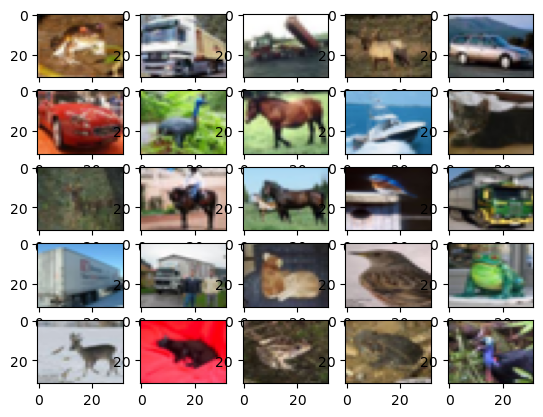

In [6]:
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [7]:
# Get number of classes, to be used for output layer 
K = np.unique(y_train).shape[0]

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
# Build the model using the functional API

# input layer
i = Input(shape=[32, 32, 3])

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# Output Layer
x = Dense(K, activation='softmax')(x)

In [16]:
model = Model(inputs=i, outputs=x)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0     

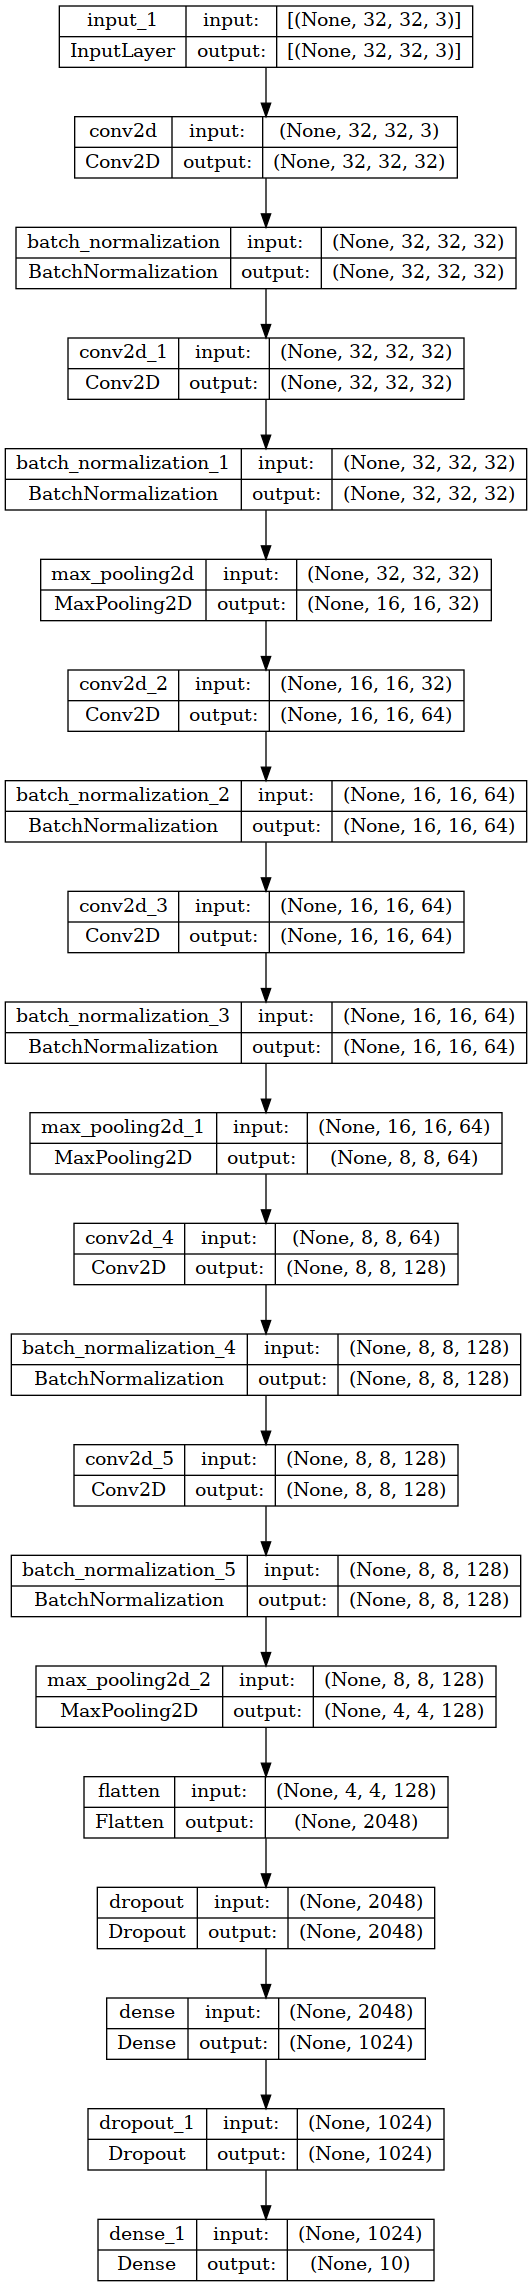

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.3193 - accuracy: 0.5487 - val_loss: 0.9862 - val_accuracy: 0.6510
Epoch 2/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8590 - accuracy: 0.7000 - val_loss: 0.8680 - val_accuracy: 0.6975
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7044 - accuracy: 0.7577 - val_loss: 0.6996 - val_accuracy: 0.7563
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.5969 - accuracy: 0.7963 - val_loss: 0.6250 - val_accuracy: 0.7931
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.5054 - accuracy: 0.8254 - val_loss: 0.6403 - val_accuracy: 0.7909
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.4330 - accuracy: 0.8514 - val_loss: 0.7072 - val_accuracy: 0.7750
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.3645 - accuracy: 0.8742 - val_loss: 0.5980 -

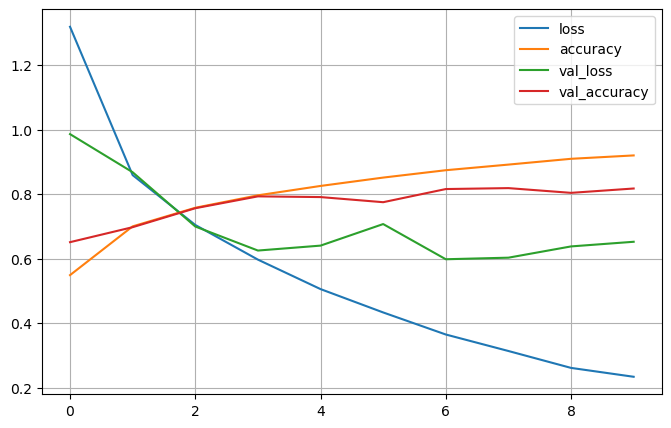

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [22]:
# save model 
model.save("model.h5")

/root/miniconda3/envs/env2/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
